In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

In [3]:
def l2(y_true, y_pred):
    return tf.square(y_true - y_pred)

In [4]:
def l1(y_true, y_pred):
    return tf.abs(y_true - y_pred)

In [17]:
def phuber1(y_true, y_pred):
    delta1 = tf.constant(0.25)
    return tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((y_true - y_pred)/delta1)) - 1.)

def phuber2(y_true, y_pred):
    delta2 = tf.constant(5.)
    return tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((y_true - y_pred)/delta2)) - 1.)

In [6]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.fill([500,], 1.)

In [7]:
def hinge(y_true, y_pred):
    return tf.maximum(0., 1. - tf.multiply(y_true, y_pred))

In [8]:
def xentropy(y_true, y_pred):
    return (- tf.multiply(y_true, tf.math.log(y_pred)) - tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))

In [9]:
def xentropy_sigmoid(y_true, y_pred):
    return tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)

In [10]:
def xentropy_weighted(y_true, y_pred):
    weight = tf.constant(0.5)
    return tf.nn.weighted_cross_entropy_with_logits(labels=y_true,
                                                   logits=y_pred,
                                                   pos_weight=weight)

In [11]:
def softmax_xentropy(y_true, y_pred):
    return tf.nn.softmax_cross_entropy_with_logits(labels=y_true,
                                                  logits=y_pred)

unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
print(softmax_xentropy(y_true=target_dist,
                      y_pred=unscaled_logits))

tf.Tensor([1.1601256], shape=(1,), dtype=float32)


In [12]:
def sparse_xentropy(y_true, y_pred):
    return tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                         logits=y_pred)
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
print(sparse_xentropy(y_true=sparse_target_dist,
                     y_pred=unscaled_logits))

tf.Tensor([0.00012564], shape=(1,), dtype=float32)


In [13]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

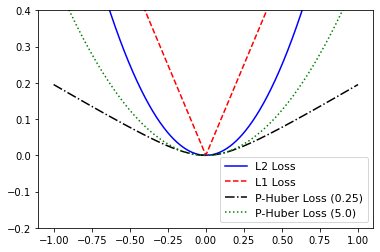

In [18]:
funcs = [(l2, '-b', 'L2 Loss'),
        (l1, 'r--', 'L1 Loss'),
        (phuber1, 'k-.', 'P-Huber Loss (0.25)'),
        (phuber2, 'g:', 'P-Huber Loss (5.0)')]

for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals),
            line_type, label=func_name)
    
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

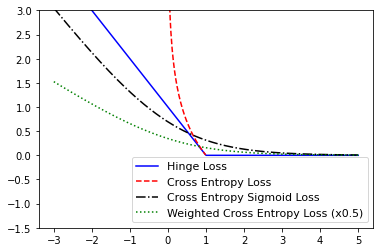

In [21]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.fill([500,], 1.)

funcs = [(hinge, 'b-', 'Hinge Loss'),
        (xentropy, 'r--', 'Cross Entropy Loss'),
        (xentropy_sigmoid, 'k-.', 'Cross Entropy Sigmoid Loss'),
        (xentropy_weighted, 'g:', 'Weighted Cross Entropy Loss (x0.5)')]

for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals), line_type, label=func_name)
    
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()